In [ ]:
from project_test_victor import colorization
import numpy as np
result = colorization(learning_rate=0.0001, n_epochs=500,
                    verbose=True,batch_size=1,ds_rate=1,dim_in=256/1,train_batches=45)

In [ ]:
#[test_out,bw_input,prior_boost.output,data_ab_enc]
result[0][0,:,:,:]-result[3][0,:,:,:]sssss

In [ ]:
from project_nn import dec_net_out_to_rgb
print(result[3]+1e-40)
#dec_net_out_to_rgb(result[0][0,:,:,:],result[1][0,:,:,:])

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import color, io,measure
%matplotlib inline


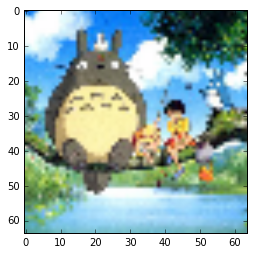

In [16]:
ind = 3
image_net_out_flattened = result[ind][0,:,:,:].flatten()
data_l = result[1][0,:,:,:]
ref_Qcolor_bins = np.load('pts_in_hull.npy')
if ind == 0:
    data_ab = np.dot(image_net_out_flattened.reshape(313,4096).T, ref_Qcolor_bins)
else:
    data_ab = np.dot(image_net_out_flattened.reshape(4096,313), ref_Qcolor_bins)
data_a_chan = (data_ab[:,0]).reshape(64,64,1)
data_b_chan = (data_ab[:,1]).reshape(64,64,1)
img_construct = np.concatenate((data_a_chan, data_b_chan), axis=2)
img_construct = np.concatenate((data_l[:,::4,::4].reshape(64,64,1)+50, img_construct), axis=2)
from skimage import color, io,measure
%matplotlib inline
plt.imshow(color.lab2rgb(img_construct))
plt.show()

C:\Users\V\Anaconda2\lib\site-packages\skimage\color\colorconv.py:901: UserWarning: Color data out of range: Z < 0 in 413 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


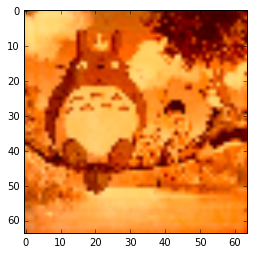

In [23]:
ind = 0
image_net_out_flattened = result[ind][0,:,:,:].flatten()
data_l = result[1][0,:,:,:]
ref_Qcolor_bins = np.load('pts_in_hull.npy')
if ind == 0:
    data_ab = np.dot(image_net_out_flattened.reshape(313,4096).T, ref_Qcolor_bins)
else:
    data_ab = np.dot(image_net_out_flattened.reshape(4096,313), ref_Qcolor_bins)
data_a_chan = (data_ab[:,0]).reshape(64,64,1)
data_b_chan = (data_ab[:,1]).reshape(64,64,1)
img_construct = np.concatenate((data_a_chan, data_b_chan), axis=2)
img_construct = np.concatenate((data_l[:,::4,::4].reshape(64,64,1)+50, img_construct), axis=2)
#img_construct = img_construct.transpose(1,2,0)import pyplot as plt
from skimage import color, io,measure
%matplotlib inline
plt.imshow(color.lab2rgb(img_construct))
plt.show()

In [ ]:
y = result[4]
ab_enc = result[3]
output = result[0]

In [ ]:
sum(image_net_out_flattened.reshape(313,4096).T[1,:])

In [ ]:

ref_prior = np.load('./prior_probs.npy')

In [ ]:
np.shape(ab_enc)

In [ ]:

from matplotlib import pyplot as plt
from skimage import color, io,measure
%matplotlib inline
plt.imshow(color.lab2rgb(img_construct))
plt.show()

In [ ]:
import numpy as np
from project_test_mehmet import load_data
from project_util import encode_ab_to_Q 

data_set = load_data('data', False)
data_a_chan = data_set[1][219][:64*64]
data_b_chan = data_set[1][219][64*64:2*64*64]
distances, indices, wts = encode_ab_to_Q(data_a_chan, data_b_chan)

In [ ]:
img_enc = np.zeros((64*64, 313 ))
x_ind =np.arange(0,4096,dtype='int')[:,np.newaxis]
img_enc[x_ind, indices] = wts
img_flt = img_enc.flatten()
print img_flt.reshape(4096,313)[0]

In [ ]:
import urllib2
from bs4 import BeautifulSoup
import os, sys
from PIL import Image
from resizeimage import resizeimage
import numpy as np
from matplotlib import pyplot as plt
from skimage import color, io
import theano
%matplotlib inline

data_l = ((result[0][3]).reshape(1,256,256)).transpose(1,2,0)
data_ab_y = ((result[1][3]).reshape(2,256,256)).transpose(1,2,0)
data_ab_nn = ((result[2][3]).reshape(2,256,256)).transpose(1,2,0)
img_construct = np.concatenate((data_l.astype(np.float64),data_ab_nn.astype(np.float64)), axis=2)
plt.imshow(color.lab2rgb(img_construct))
plt.show()

In [ ]:
batch_num = 1
print('Loading Batch ' + str(batch_num))

In [ ]:
test=np.array(((1,2,3),(1,2,3)))
print(test)
print(test.flatten('C'))
test2 = np.reshape(test.flatten('C'),(3,2),'C')
print(np.reshape(test.flatten(),(3,2),'C'))
print(test[1,:])
print(test2[:,1])

In [1]:
from Colorization_Network import colorization

Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 4007)


In [2]:
test = colorization()

In [ ]:
test.build_model(batch_size=5)

... building the model


In [ ]:
test.train_network(n_epochs=500,learning_rate=0.0002,batch_num=1)

Loading Batch 1
(200L, 65536L)
Current training data size is 200


In [ ]:
result =test.test_network(ind=3)

In [18]:
np.max(data_ab)

8.3219251759004464